In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [9]:
gv = pd.read_csv("giving.csv")
ct = pd.read_csv("contacts (1).csv")
ev = pd.read_csv("events (1).csv")
fy = pd.read_csv("family (1).csv")
rl = pd.read_csv("relationships (1).csv")
dn = pd.read_csv("donors.csv")

In [10]:
gv.shape

(3836541, 8)

In [11]:
gv.head()

,Gift_ID,Donor_ID,Gift_Date,Gift_Amount,Designation,Gift_Type,Campaign_Year,Anonymous
0,1000000,770487,2021-05-22,2444.57,Men's Basketball,Online,NaN,0
1,1000001,770487,2022-11-25,4105.36,Men's Basketball,Cash,NaN,0
2,1000002,770487,2023-06-21,2286.23,Annual Fund,Credit Card,2023.0,0
3,1000003,770487,2024-10-03,2015.89,Community Service Center,Check,NaN,0
4,1000004,770487,2025-08-06,6161.84,Community Service Center,Credit Card,NaN,0


In [12]:
gv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3836541 entries, 0 to 3836540
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Gift_ID        int64  
 1   Donor_ID       int64  
 2   Gift_Date      object 
 3   Gift_Amount    float64
 4   Designation    object 
 5   Gift_Type      object 
 6   Campaign_Year  float64
 7   Anonymous      int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 234.2+ MB


In [13]:
def optimize_dataframe(df):
    
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")
    
    for col in df.columns:
        col_type = df[col].dtype
        
        # Skip datetime
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            continue
        
        # Protect ID columns
        if "id" in col.lower():
            continue
        
        # Convert object → datetime if possible
        if col_type == "object":
            try:
                df[col] = pd.to_datetime(df[col])
                continue
            except:
                pass
        
        # Detect booleans
        if df[col].dropna().isin([0,1]).all():
            df[col] = df[col].astype("bool")
            continue
        
        # Optimize integers
        if pd.api.types.is_integer_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast="integer")
        
        # Optimize floats
        elif pd.api.types.is_float_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast="float")
        
        # Optimize objects → category
        elif col_type == "object":
            num_unique = df[col].nunique()
            num_total = len(df[col])
            
            if num_unique / num_total < 0.3:
                df[col] = df[col].astype("category")
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    
    print(f"Optimized memory usage: {end_mem:.2f} MB")
    print(f"Reduced by: {(start_mem - end_mem) / start_mem * 100:.1f}%")
    
    return df

In [14]:
gv = optimize_dataframe(gv)

Initial memory usage: 800.10 MB
Optimized memory usage: 142.70 MB
Reduced by: 82.2%


In [15]:
gv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3836541 entries, 0 to 3836540
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Gift_ID        int64         
 1   Donor_ID       int64         
 2   Gift_Date      datetime64[ns]
 3   Gift_Amount    float64       
 4   Designation    category      
 5   Gift_Type      category      
 6   Campaign_Year  float32       
 7   Anonymous      bool          
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), float64(1), int64(2)
memory usage: 142.7 MB


In [16]:
gv.head()

,Gift_ID,Donor_ID,Gift_Date,Gift_Amount,Designation,Gift_Type,Campaign_Year,Anonymous
0,1000000,770487,2021-05-22,2444.57,Men's Basketball,Online,NaN,False
1,1000001,770487,2022-11-25,4105.36,Men's Basketball,Cash,NaN,False
2,1000002,770487,2023-06-21,2286.23,Annual Fund,Credit Card,2023.0,False
3,1000003,770487,2024-10-03,2015.89,Community Service Center,Check,NaN,False
4,1000004,770487,2025-08-06,6161.84,Community Service Center,Credit Card,NaN,False


In [17]:
gv.isna().sum().sort_values(ascending=False)

Campaign_Year    2685275
Gift_ID                0
Donor_ID               0
Gift_Date              0
Gift_Amount            0
Designation            0
Gift_Type              0
Anonymous              0
dtype: int64

In [18]:
gv.duplicated(subset="Gift_ID").sum()

0

In [19]:
gv["Gift_Amount"].describe()

count    3.836541e+06
mean     6.774445e+03
std      1.264841e+05
min      0.000000e+00
25%      2.500000e+01
50%      8.919000e+01
75%      8.083400e+02
max      6.508046e+07
Name: Gift_Amount, dtype: float64

In [20]:
gv[gv["Gift_Amount"] <= 0]

,Gift_ID,Donor_ID,Gift_Date,Gift_Amount,Designation,Gift_Type,Campaign_Year,Anonymous
137,1000137,127824,2015-09-23,0.0,Club Sports,Cash,2015.0,False
260,1000260,267414,2003-10-03,0.0,History Department,Stock,NaN,False
261,1000261,267414,2004-10-07,0.0,Capital Campaign,Credit Card,NaN,False
262,1000262,267414,2006-10-13,0.0,Capital Campaign,Credit Card,NaN,False
263,1000263,267414,2007-10-10,0.0,Library,Credit Card,NaN,False
...,...,...,...,...,...,...,...,...
3836265,4836265,882274,1992-04-21,0.0,Women's Volleyball,Online,NaN,False
3836266,4836266,882274,1995-05-12,0.0,Greek Life,Credit Card,NaN,False
3836267,4836267,882274,1996-02-27,0.0,Engineering Department,Cash,1996.0,False
3836268,4836268,882274,1997-12-03,0.0,Men's Basketball,Check,NaN,False


In [21]:
zero_pct = (gv["Gift_Amount"] == 0).mean() * 100
zero_pct

11.164171059295338

In [22]:
gv[gv["Gift_Amount"] == 0]["Gift_Type"].value_counts()

Gift_Type
Cash           86078
Online         85815
Stock          85640
Check          85542
Credit Card    85243
Name: count, dtype: int64

In [23]:
cash_gifts = gv[gv["Gift_Amount"] > 0]

In [24]:
cash_gifts["Gift_Amount"].describe(percentiles=[.5,.75,.9,.95,.99])

count    3.408223e+06
mean     7.625803e+03
std      1.341725e+05
min      1.000000e-02
50%      1.516600e+02
75%      1.062070e+03
90%      5.985778e+03
95%      1.678889e+04
99%      1.128179e+05
max      6.508046e+07
Name: Gift_Amount, dtype: float64

In [25]:
gv[gv["Gift_Amount"] == 0]["Anonymous"].mean()

0.04966169995190489

In [26]:
donor_totals = gv.groupby("Donor_ID")["Gift_Amount"].sum()

zero_only_donors = (donor_totals == 0).sum()

zero_only_donors

0

In [27]:
donor_totals.describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    2.528210e+05
mean     1.028017e+05
std      1.023402e+06
min      1.000000e+00
25%      9.112000e+02
50%      4.936210e+03
75%      2.659343e+04
90%      1.215341e+05
95%      3.000409e+05
99%      1.645675e+06
max      1.000000e+08
Name: Gift_Amount, dtype: float64

In [28]:
(low_donors := (donor_totals < 100).mean() * 100)

5.908132631387424

In [29]:
lifetime = donor_totals.sort_values(ascending=False)

In [30]:
lifetime.describe(percentiles=[.9,.95,.99,.999])

count    2.528210e+05
mean     1.028017e+05
std      1.023402e+06
min      1.000000e+00
50%      4.936210e+03
90%      1.215341e+05
95%      3.000409e+05
99%      1.645675e+06
99.9%    9.930293e+06
max      1.000000e+08
Name: Gift_Amount, dtype: float64

In [31]:
cum_share = lifetime.cumsum() / lifetime.sum()

In [32]:
cum_share.reset_index()

,Donor_ID,Gift_Amount
0,996437,0.003848
1,307954,0.007695
2,161298,0.011543
3,299330,0.015390
4,394121,0.019238
...,...,...
252816,497329,1.000000
252817,646473,1.000000
252818,403926,1.000000
252819,231145,1.000000


In [33]:
donor_pct_50 = cum_share.searchsorted(0.5) / len(cum_share) * 100
donor_pct_50

0.8223209306188963

top 0.82% donors generates half of the money

In [34]:
lifetime

Donor_ID
996437    100000000.0
307954    100000000.0
161298    100000000.0
299330    100000000.0
394121    100000000.0
             ...     
497329            1.0
646473            1.0
403926            1.0
231145            1.0
439063            1.0
Name: Gift_Amount, Length: 252821, dtype: float64

In [35]:
lifetime.sum()

25990436801.129997

In [36]:
top_1pct_cutoff = lifetime.quantile(0.99)

top_1pct_share = (
    lifetime[lifetime >= top_1pct_cutoff].sum()
    / lifetime.sum()
)

top_1pct_share

0.5310262736111437

In [37]:
lifetime[lifetime >= top_1pct_cutoff].sum()

13801604804.029999

top 1% donors contribute 53% of money and the amount is total  13801604804 out of 25990436801

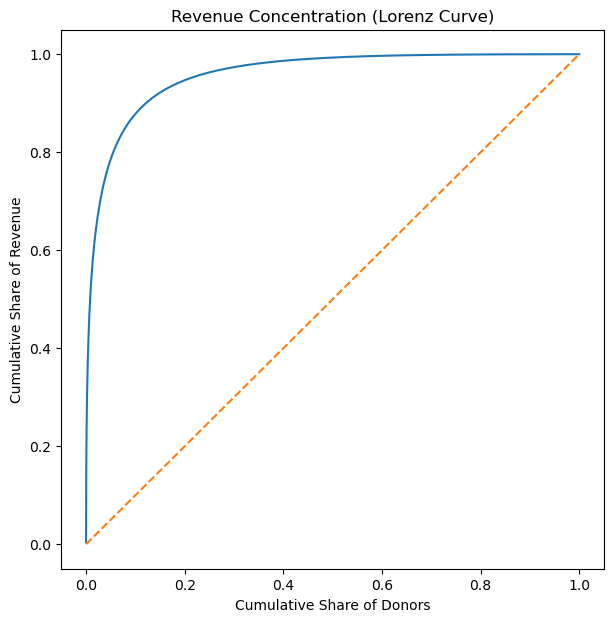

In [38]:
plt.figure(figsize=(7,7))

plt.plot(
    np.linspace(0,1,len(cum_share)),
    cum_share
)

plt.plot([0,1],[0,1], linestyle="--")  # equality line

plt.xlabel("Cumulative Share of Donors")
plt.ylabel("Cumulative Share of Revenue")

plt.title("Revenue Concentration (Lorenz Curve)")

plt.show()

In [39]:
gift_counts = gv.groupby("Donor_ID").size()

gift_counts.describe()

count    252821.000000
mean         15.174930
std          11.502675
min           1.000000
25%           5.000000
50%          12.000000
75%          24.000000
max          36.000000
dtype: float64

In [40]:
donor_summary = gv.groupby("Donor_ID").agg({
    "Gift_Amount":"sum",
    "Gift_ID":"count"
})

donor_summary.rename(columns={
    "Gift_Amount":"lifetime_value",
    "Gift_ID":"frequency"
}, inplace=True)

donor_summary.corr()

,lifetime_value,frequency
lifetime_value,1.000000,0.000263
frequency,0.000263,1.000000


In [41]:
donor_summary.sort_values("lifetime_value", ascending=False).head(10)

,lifetime_value,frequency
Donor_ID,,
996437,1.000000e+08,36
307954,1.000000e+08,10
161298,1.000000e+08,5
299330,1.000000e+08,14
394121,1.000000e+08,12
274298,9.372050e+07,19
963684,9.002467e+07,20
704414,7.984056e+07,36
393481,7.703458e+07,35


In [42]:
donor_summary.sort_values("frequency", ascending=False).head(10)

,lifetime_value,frequency
Donor_ID,,
410814,1383.84,36
205282,1398.68,36
431415,63419.38,36
750626,4.51,36
689695,256.04,36
619375,3617.55,36
431473,118.81,36
689708,21417.58,36
205333,3683.49,36


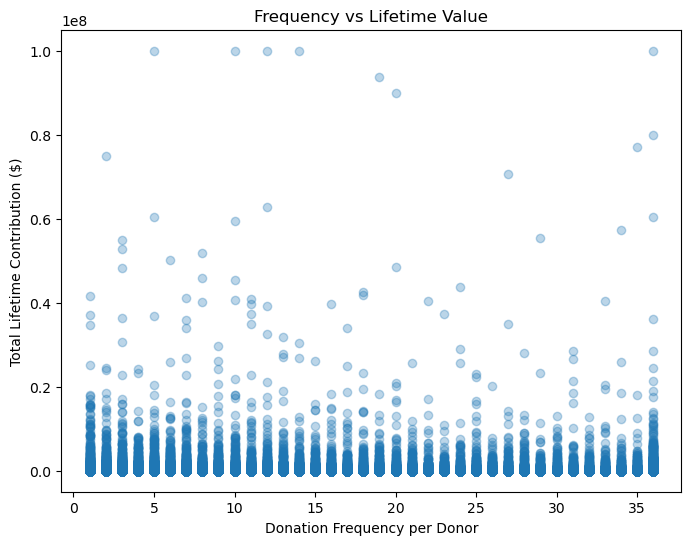

In [43]:
plt.figure(figsize=(8,6))

plt.scatter(
    donor_summary["frequency"],
    donor_summary["lifetime_value"],
    alpha=0.3
)

plt.xlabel("Donation Frequency per Donor")
plt.ylabel("Total Lifetime Contribution ($)")

plt.title("Frequency vs Lifetime Value")

plt.show()

In [44]:
gift_counts = gv.groupby("Donor_ID").size()

(gift_counts == 1).mean() * 100


7.020382009405863

In [45]:
freq_bins = pd.cut(
    donor_summary["frequency"],
    bins=[0,1,5,12,24,100],
    labels=["1x","2-5","6-12","13-24","24+"]
)

donor_summary.groupby(freq_bins)["lifetime_value"].sum()

frequency
1x       1.734745e+09
2-5      5.142921e+09
6-12     6.370644e+09
13-24    6.312813e+09
24+      6.429315e+09
Name: lifetime_value, dtype: float64

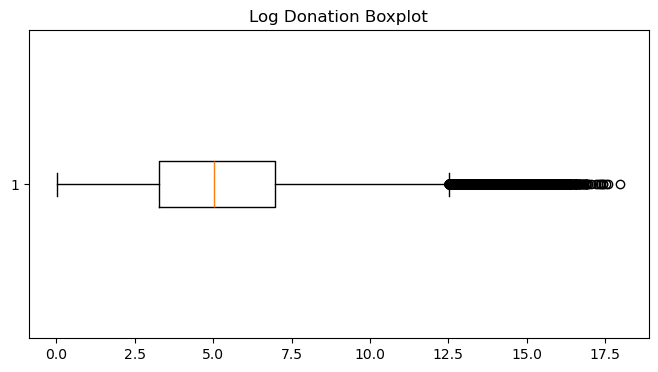

In [46]:
plt.figure(figsize=(8,4))
plt.boxplot(np.log1p(cash_gifts["Gift_Amount"]), vert=False)
plt.title("Log Donation Boxplot")
plt.show()


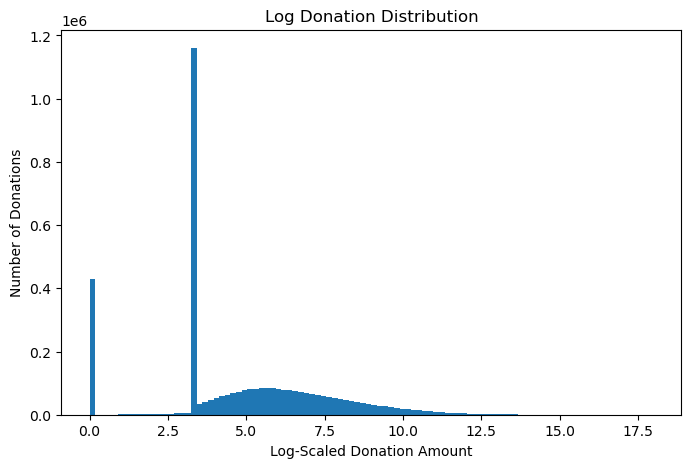

In [47]:
plt.figure(figsize=(8,5))
plt.hist(np.log1p(gv["Gift_Amount"]), bins=100)
plt.xlabel("Log-Scaled Donation Amount")
plt.ylabel("Number of Donations")
plt.title("Log Donation Distribution")
plt.show()


<Axes: title={'center': 'Monthly Donation Trend'}, xlabel='Donation Month', ylabel='Total Donation Amount ($)'>

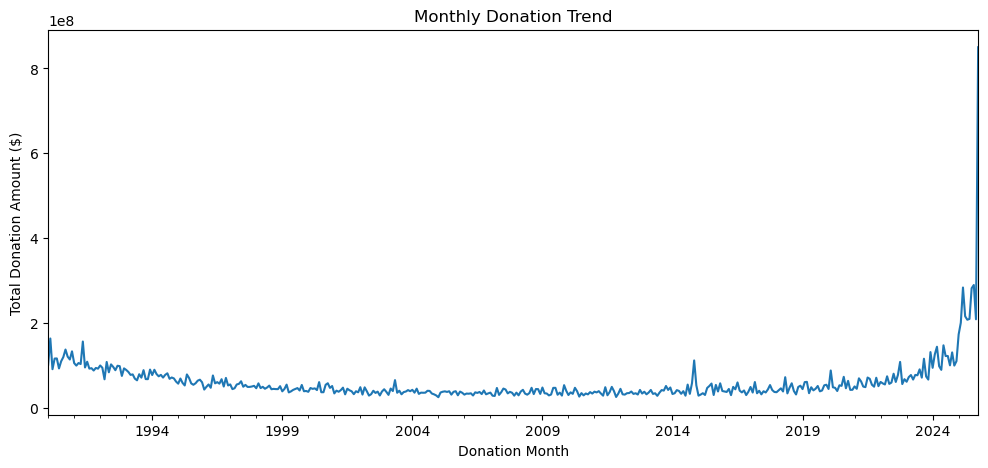

In [48]:
gv["Gift_Date"] = pd.to_datetime(gv["Gift_Date"])

monthly = gv.resample("M", on="Gift_Date")["Gift_Amount"].sum()

monthly.plot(figsize=(12,5), title="Monthly Donation Trend",xlabel = "Donation Month",ylabel = "Total Donation Amount ($)")

In [49]:
monthly.sort_values(ascending=False).head()

Gift_Date
2025-10-31    8.500005e+08
2025-08-31    2.900813e+08
2025-03-31    2.841699e+08
2025-07-31    2.824764e+08
2025-04-30    2.164104e+08
Name: Gift_Amount, dtype: float64

In [50]:
monthly.median(), monthly.mean()

(46795228.25, 60442876.281697676)

<Axes: title={'center': '12-Month Rolling Donations'}, xlabel='Time', ylabel='12-Month Average Donation ($)'>

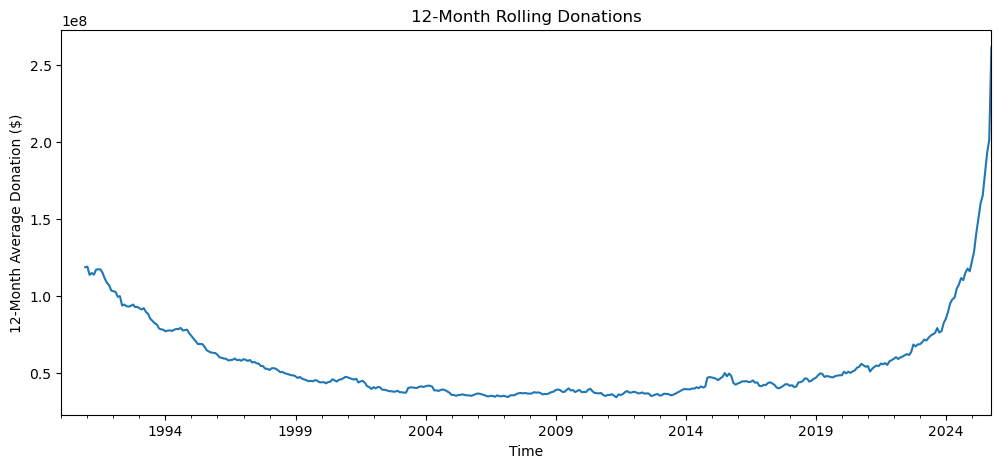

In [51]:
monthly.rolling(12).mean().plot(figsize=(12,5), title="12-Month Rolling Donations",xlabel = "Time",ylabel="12-Month Average Donation ($)")


In [52]:
snapshot = gv["Gift_Date"].max()

last_gift = gv.groupby("Donor_ID")["Gift_Date"].max()

recency_days = (snapshot - last_gift).dt.days

recency_days.describe()

count    252821.000000
mean        719.083533
std        1396.574694
min           0.000000
25%          86.000000
50%         237.000000
75%         670.000000
max       13076.000000
Name: Gift_Date, dtype: float64

In [53]:
rfm = gv.groupby("Donor_ID").agg({
    "Gift_Date": lambda x: (snapshot - x.max()).days,
    "Gift_ID": "count",
    "Gift_Amount": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]

rfm.head()

,Recency,Frequency,Monetary
Donor_ID,,,
100006,524,2,389.31
100009,0,5,6659.22
100010,11175,1,4075.93
100015,0,28,61985.17
100016,234,13,1072.01


In [54]:
rfm["R_score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

In [55]:
rfm["RFM_Score"] = (
    rfm["R_score"].astype(str) +
    rfm["F_score"].astype(str) +
    rfm["M_score"].astype(str)
)

In [56]:
rfm.sample(5)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
Donor_ID,,,,,,,
849861,257,3,1811.14,2,1,2,212
525139,490,26,2499.86,2,4,2,242
745512,673,2,60147.92,1,1,4,114
421098,0,15,2829.89,4,3,2,432
410301,2377,2,2769.24,1,1,2,112


In [57]:
def donor_segment(row):
    
    if row["R_score"] == 4 and row["F_score"] >= 3:
        return "Champions"
    
    elif row["R_score"] >= 3 and row["F_score"] >= 2:
        return "Loyal Donors"
    
    elif row["R_score"] == 4:
        return "New Donors"
    
    elif row["R_score"] <= 2 and row["F_score"] >= 3:
        return "At Risk"
    
    else:
        return "Hibernating"

rfm["Segment"] = rfm.apply(donor_segment, axis=1)

In [58]:
rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
Donor_ID,,,,,,,,
100006,524,2,389.31,2,1,1,211,Hibernating
100009,0,5,6659.22,4,1,3,413,New Donors
100010,11175,1,4075.93,1,1,2,112,Hibernating
100015,0,28,61985.17,4,4,4,444,Champions
100016,234,13,1072.01,3,3,2,332,Loyal Donors
...,...,...,...,...,...,...,...,...
999967,4733,1,95282.58,1,1,4,114,Hibernating
999978,80,15,1593.13,4,3,2,432,Champions
999983,1291,4,2624.80,1,1,2,112,Hibernating


In [59]:
rfm["Segment"].value_counts()

Segment
Hibernating     90436
Loyal Donors    65886
At Risk         46019
Champions       40150
New Donors      10330
Name: count, dtype: int64

In [60]:
rfm.groupby("Segment")["Monetary"].sum().sort_values(ascending=False)

Segment
Hibernating     8.913850e+09
Loyal Donors    7.017185e+09
At Risk         4.841088e+09
Champions       4.057099e+09
New Donors      1.161214e+09
Name: Monetary, dtype: float64

<Axes: title={'center': 'Donor Segments'}, xlabel='RFM Donor Segment', ylabel='Donor Count'>

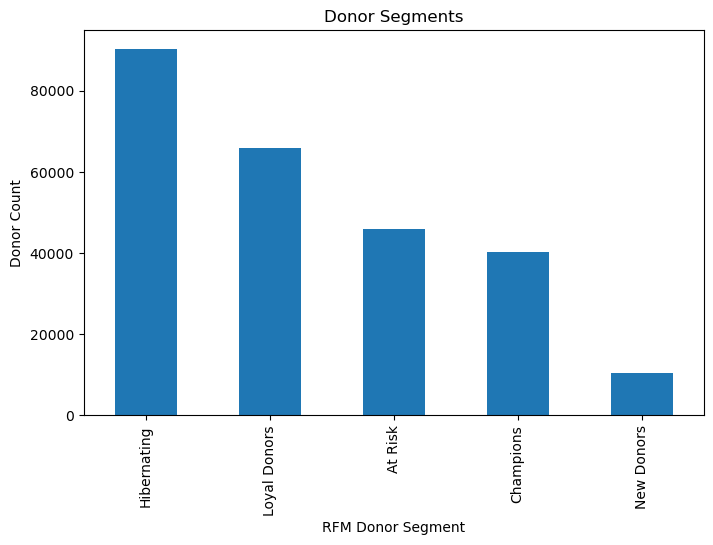

In [61]:
rfm["Segment"].value_counts().plot(
    kind="bar",
    figsize=(8,5),
    title="Donor Segments",
    xlabel= "RFM Donor Segment",
    ylabel="Donor Count"

)

The largest share of lifetime revenue comes from donors who are no longer actively engaged, representing a major reactivation opportunity.

In [62]:
rfm.groupby("Segment")["Monetary"].mean().sort_values(ascending=False)

Segment
New Donors      112411.838480
Loyal Donors    106504.954113
At Risk         105197.602754
Champions       101048.545038
Hibernating      98565.278634
Name: Monetary, dtype: float64

<Axes: title={'center': 'Revenue by Donor Segment'}, xlabel='Donor Category', ylabel='Revenue Contribution ($)'>

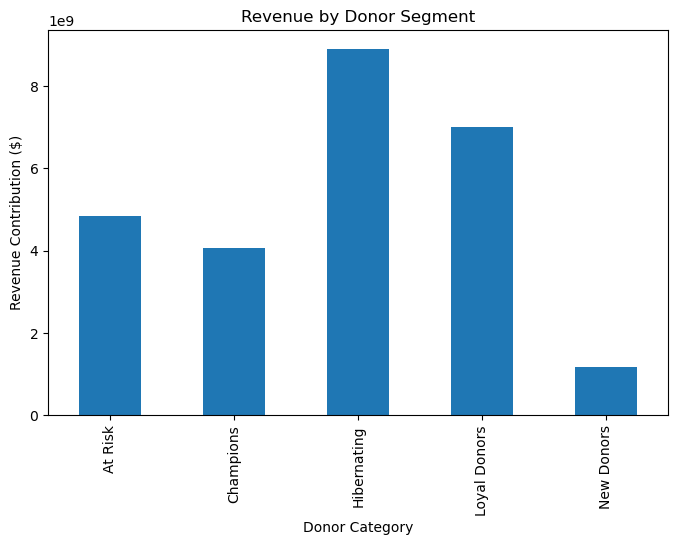

In [63]:
rfm.groupby("Segment")["Monetary"].sum().plot(
    kind="bar",
    figsize=(8,5),
    title="Revenue by Donor Segment",
    xlabel= "Donor Category",
    ylabel= "Revenue Contribution ($)"
    
)

In [64]:
rfm.groupby("Segment")["Recency"].mean().sort_values()

Segment
Champions         23.124757
New Donors        23.461665
Loyal Donors     135.184986
At Risk          597.676873
Hibernating     1594.689172
Name: Recency, dtype: float64

In [65]:
campaign_revenue = gv.groupby("Designation")["Gift_Amount"].sum() \
                     .sort_values(ascending=False)

campaign_revenue.head(10)

Designation
Aquatic Center                 1.026910e+09
Annual Fund                    1.014345e+09
Library                        1.011448e+09
Computer Science Department    1.009339e+09
Veterans Center                1.000968e+09
Community Service Center       9.973022e+08
Scholarships                   9.960061e+08
Alumni Association             9.936276e+08
Club Sports                    9.917485e+08
Finance Club                   9.829639e+08
Name: Gift_Amount, dtype: float64

In [66]:
campaign_donors = gv.groupby("Designation")["Donor_ID"].nunique()

campaign_efficiency = pd.concat(
    [campaign_revenue, campaign_donors],
    axis=1
)

campaign_efficiency.columns = ["Revenue", "Unique Donors"]

campaign_efficiency["Avg Donation"] = (
    campaign_efficiency["Revenue"] /
    campaign_efficiency["Unique Donors"]
)

campaign_efficiency.sort_values("Revenue", ascending=False).head(10)

,Revenue,Unique Donors,Avg Donation
Designation,,,
Aquatic Center,1.026910e+09,97423,10540.739320
Annual Fund,1.014345e+09,97615,10391.281622
Library,1.011448e+09,97400,10384.481364
Computer Science Department,1.009339e+09,97424,10360.269920
Veterans Center,1.000968e+09,97131,10305.336882
Community Service Center,9.973022e+08,97540,10224.546295
Scholarships,9.960061e+08,97159,10251.300567
Alumni Association,9.936276e+08,97422,10199.211229
Club Sports,9.917485e+08,97401,10182.118547


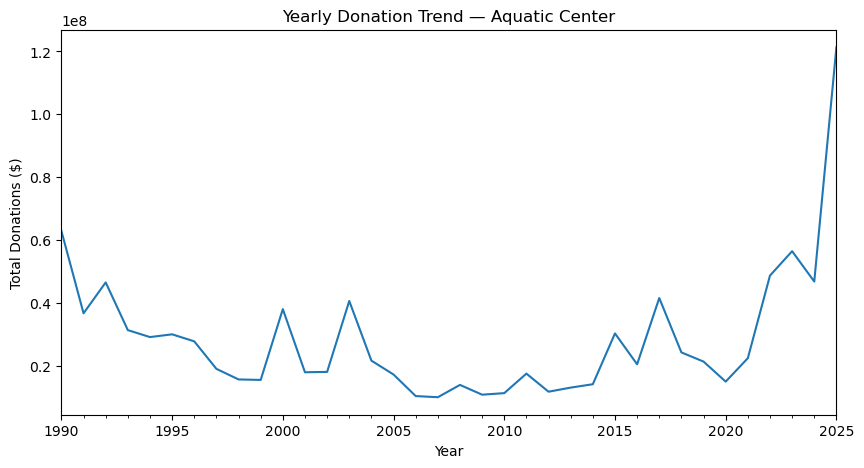

In [67]:
top_campaign = campaign_revenue.index[0]

gv[gv["Designation"] == top_campaign] \
    .resample("Y", on="Gift_Date")["Gift_Amount"] \
    .sum() \
    .plot(figsize=(10,5))

plt.title(f"Yearly Donation Trend — {top_campaign}")
plt.xlabel("Year")
plt.ylabel("Total Donations ($)")
plt.show()

In [68]:
campaign_revenue.head(5).sum() / campaign_revenue.sum()*100

19.480282456545215

Top 5 campaigns generate ONLY ~20% of total revenue.

The organization demonstrates strong revenue diversification, reducing dependence on a small number of fundraising initiatives.

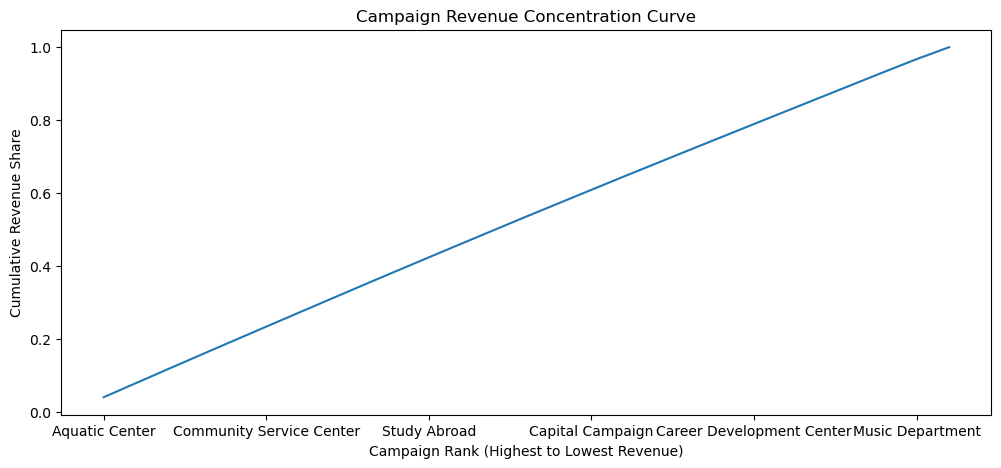

In [69]:
campaign_revenue_sorted = campaign_revenue.sort_values(ascending=False)

campaign_share = campaign_revenue_sorted.cumsum() / campaign_revenue_sorted.sum()

campaign_share.plot(figsize=(12,5))

plt.title("Campaign Revenue Concentration Curve")
plt.xlabel("Campaign Rank (Highest to Lowest Revenue)")
plt.ylabel("Cumulative Revenue Share")

plt.show()


While donation revenue is highly concentrated among top donors, it is well diversified across campaigns, suggesting reduced program-level financial risk.

• Donation revenue is heavily concentrated among top donors                                                                     
• Campaign funding is well diversified, reducing program risk                                                                       
• Large pool of inactive donors presents major reactivation opportunity                                                             
• Recent donation trends show acceleration                                                                                          
• Organization appears financially stable but donor concentration introduces dependency risk

In [70]:
import pandas as pd
import numpy as np


In [71]:
df = pd.read_csv("giving.csv")
df.head()


,Gift_ID,Donor_ID,Gift_Date,Gift_Amount,Designation,Gift_Type,Campaign_Year,Anonymous
0,1000000,770487,2021-05-22,2444.57,Men's Basketball,Online,NaN,0
1,1000001,770487,2022-11-25,4105.36,Men's Basketball,Cash,NaN,0
2,1000002,770487,2023-06-21,2286.23,Annual Fund,Credit Card,2023.0,0
3,1000003,770487,2024-10-03,2015.89,Community Service Center,Check,NaN,0
4,1000004,770487,2025-08-06,6161.84,Community Service Center,Credit Card,NaN,0


In [74]:
gv.columns
dn.columns
ev.columns




Index(['Donor_ID', 'Event_Name', 'Attendance_Date'], dtype='object')

In [75]:
gv = gv.rename(columns={
    'amount': 'donation_amount',
    'gift_date': 'donation_date'
})


In [77]:
print(gv.columns.tolist())


['Gift_ID', 'Donor_ID', 'Gift_Date', 'Gift_Amount', 'Designation', 'Gift_Type', 'Campaign_Year', 'Anonymous']


In [78]:
gv = gv.rename(columns={
    'Gift_ID': 'gift_id',
    'Donor_ID': 'donor_id',
    'Gift_Date': 'donation_date',
    'Gift_Amount': 'donation_amount'
})


In [79]:
gv.columns = gv.columns.str.lower()


In [80]:
gv = gv.drop_duplicates()

gv = gv[gv['donation_amount'] > 0]

gv['donation_date'] = pd.to_datetime(gv['donation_date'])


In [81]:
donor_summary = (
    gv.groupby('donor_id')
    .agg(
        first_donation_date=('donation_date', 'min'),
        last_donation_date=('donation_date', 'max'),
        total_donations=('donation_amount', 'count'),
        total_amount=('donation_amount', 'sum'),
        avg_donation_amount=('donation_amount', 'mean')
    )
    .reset_index()
)


In [82]:
donor_summary['donation_frequency_days'] = (
    (donor_summary['last_donation_date'] - donor_summary['first_donation_date'])
    .dt.days
    .div(donor_summary['total_donations'])
)


In [83]:
latest_date = gv['donation_date'].max()
cutoff_date = latest_date - pd.DateOffset(months=6)

active_donors = (
    gv[gv['donation_date'] >= cutoff_date]
    .groupby('donor_id')
    .size()
    .reset_index(name='active_flag')
)

active_donors['active_flag'] = 1


In [84]:
donor_summary = donor_summary.merge(
    active_donors[['donor_id', 'active_flag']],
    on='donor_id',
    how='left'
)

donor_summary['active_flag'] = donor_summary['active_flag'].fillna(0)


In [85]:
platform_summary = (
    gv.groupby('designation')
    .agg(
        total_donors=('donor_id', 'nunique'),
        total_donations=('donation_amount', 'count'),
        total_amount=('donation_amount', 'sum'),
        avg_donation=('donation_amount', 'mean'),
        donation_std=('donation_amount', 'std')
    )
    .reset_index()
)

platform_summary['volatility_ratio'] = (
    platform_summary['donation_std'] / platform_summary['avg_donation']
)


In [86]:
active_platform_donors = (
    gv[gv['donation_date'] >= cutoff_date]
    .groupby('designation')['donor_id']
    .nunique()
    .reset_index(name='active_donors')
)

platform_summary = platform_summary.merge(
    active_platform_donors,
    on='designation',
    how='left'
)

platform_summary['retention_rate'] = (
    platform_summary['active_donors'] / platform_summary['total_donors']
)


In [87]:
def normalize(series, inverse=False):
    if series.max() == series.min():
        return 50
    return (
        100 * (1 - (series - series.min()) / (series.max() - series.min()))
        if inverse else
        100 * (series - series.min()) / (series.max() - series.min())
    )


In [88]:
platform_summary['retention_score'] = normalize(platform_summary['retention_rate'])
platform_summary['volatility_score'] = normalize(platform_summary['volatility_ratio'], inverse=True)
platform_summary['volume_score'] = normalize(platform_summary['total_amount'])


In [89]:
platform_summary['trust_score'] = (
    0.4 * platform_summary['retention_score'] +
    0.35 * platform_summary['volatility_score'] +
    0.25 * platform_summary['volume_score']
)


In [90]:
platform_summary['trust_band'] = pd.cut(
    platform_summary['trust_score'],
    bins=[0, 40, 70, 100],
    labels=['Low Trust', 'Medium Trust', 'High Trust']
)


In [91]:
final_trust_score = platform_summary[[
    'designation',
    'trust_score',
    'trust_band',
    'retention_rate',
    'volatility_ratio',
    'total_amount'
]]

final_trust_score.sort_values('trust_score', ascending=False).head()


,designation,trust_score,trust_band,retention_rate,volatility_ratio,total_amount
17,Men's Basketball,83.527157,High Trust,0.037472,14.698875,9.761385e+08
3,Capital Campaign,82.174651,High Trust,0.037551,14.536478,9.526670e+08
20,Scholarships,79.523172,High Trust,0.037155,14.935426,9.960061e+08
2,Aquatic Center,75.981549,High Trust,0.037472,21.286601,1.026910e+09
24,Veterans Center,75.188685,High Trust,0.037465,19.952353,1.000968e+09


In [92]:
final_trust_score.to_csv("trust_score_final.csv", index=False)


In [93]:
final_trust_score.head()


,designation,trust_score,trust_band,retention_rate,volatility_ratio,total_amount
0,Alumni Association,67.433576,Medium Trust,0.037007,18.905701,9.936276e+08
1,Annual Fund,48.268773,Medium Trust,0.036209,21.728668,1.014345e+09
2,Aquatic Center,75.981549,High Trust,0.037472,21.286601,1.026910e+09
3,Capital Campaign,82.174651,High Trust,0.037551,14.536478,9.526670e+08
4,Career Development Center,63.699615,Medium Trust,0.036746,14.341376,9.313643e+08


In [95]:
import os
os.getcwd()



'/Users/user'

In [96]:
os.listdir()


['speech recognition.ipynb',
 'Untitled10.ipynb',
 'Untitled7.ipynb',
 'Hrishikesh Resume.pdf',
 '.config',
 'Music',
 'Loan Default prediction ML.ipynb',
 'scaler.pkl',
 'giving.csv',
 'Expanded_data_with_more_features.csv',
 '.condarc',
 '.docker',
 '.gemini',
 'Untitled12.ipynb',
 'Mall_Customers.csv',
 'Untitled5.ipynb',
 'python basics.ipynb',
 'Sonar Rock vs mine prediction.ipynb',
 'Films.csv',
 'Untitled1.ipynb',
 'Book 2(Sheet1).csv',
 'Untitled16.ipynb',
 'trust_score_final.csv',
 '.DS_Store',
 'student_data.csv',
 'nltk_data',
 'intro to matplotlib.ipynb',
 'Creating Data Frames.ipynb',
 '.CFUserTextEncoding',
 'Project 13. Customer Segmentation using K-Means Clustering with Python | Machine Learning Projects.ipynb',
 'dogs_only',
 'Car Prediction Model.ipynb',
 'gold price prediction.ipynb',
 '.xonshrc',
 'indexing.ipynb',
 'anaconda_projects',
 'Untitled14.ipynb',
 'Untitled.ipynb',
 'car data.csv',
 'heart_disease_data.csv',
 '.zshrc',
 'Personal Productivity & Focus Scor

In [100]:
df = pd.read_csv("trust_score_final.csv")


In [101]:
df.head()


,designation,trust_score,trust_band,retention_rate,volatility_ratio,total_amount
0,Alumni Association,67.433576,Medium Trust,0.037007,18.905701,9.936276e+08
1,Annual Fund,48.268773,Medium Trust,0.036209,21.728668,1.014345e+09
2,Aquatic Center,75.981549,High Trust,0.037472,21.286601,1.026910e+09
3,Capital Campaign,82.174651,High Trust,0.037551,14.536478,9.526670e+08
4,Career Development Center,63.699615,Medium Trust,0.036746,14.341376,9.313643e+08
